# OpenCV Library


Estimated time needed: **60** minutes


<h2>Objectives</h2>


Image processing and computer vision tasks include displaying, cropping, flipping, rotating,  image segmentation, classification, image restoration,  image recognition, image generation.  Also, working with images via the cloud requires storing and transmitting, and gathering images through the internet. 
Python is an excellent choice as it has many image processing tools, computer vision, and artificial intelligence libraries. Finally, it has many libraries for working with files in the cloud and the internet.
A digital image is simply a file on your computer. In this lab, you will gain an understanding  of these files and learn to work with these files with some popular libraries


<ul>
    <li><a href='#PIL'>Open CV </a>
        <ul>
            <li>Image Files and Paths  </li>
            <li>Load in Image in Python</li>
            <li>Plotting an Image </li>
            <li>Gray Scale Images, Quantization and Color Channels  </li>
            <li>Gray Scale Images, Quantization and Color Channels  </li>
        </ul>
    </li>
    
</ul>


----


Download the image for the lab:


In [ ]:

# ta sử dụng wget để tải các ảnh mẫu : lenna.png, baboon.png, barbara.png.
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png -O lenna.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png -O baboon.png
!wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/barbara.png -O barbara.png  

--2026-01-09 13:47:43--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/lenna.png
Đang phân giải cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)… 169.45.118.108
Kết nối tới cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)[169.45.118.108]:443… đã kết nối.
Đã gửi yêu cầu HTTP, đang đợi câu trả lời… 200 OK
Kích thước: 473831 (463K) [image/png]
Đang ghi vào: “lenna.png”

lenna.png           100%[===================>] 462.73K   164KB/s    trong 2.8s 

2026-01-09 13:47:47 (164 KB/s) — đã lưu “lenna.png” [473831/473831]

--2026-01-09 13:47:48--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-CV0101EN-SkillsNetwork/images%20/images_part_1/baboon.png
Đang phân giải cf-courses-data.s3.us.cloud-object-storage.appdomain.

First, let's define a helper function to concatenate two images side-by-side. You will need to understand this code this moment, but this function will be used repeatedly in this tutorial to showcase the results.


In [ ]:
# Import thư viện Image từ tkinter dùng để xử lý ảnh cơ bản
from tkinter import Image
# Định nghĩa hàm nối 2 ảnh theo chiều ngang 
def get_concat_h(im1, im2):
    # Tạo ảnh mới với kích thước bằng tổng chiều rộng của 2 ảnh, chiều cao bằng chiều cao ảnh đầu
    dst = Image.new('RGB', (im1.width + im2.width, im1.height))
    # Dán ảnh thứ nhất vào vị trí (0,0) - góc trái trên
    dst.paste(im1, (0, 0))
    # Dán ảnh thứ hai vào vị trí bên phải ảnh thứ nhất
    dst.paste(im2, (im1.width, 0))
    return dst

## Image Files and Paths  


An image is stored as a file on your computer. Below, we define `my_image` as the filename of a file in this directory.


In [ ]:
# Khai báo tên file ảnh sẽ sử dụng
my_image = "lenna.png"

Filename consists of two parts, the name of the file and the extension, separated by a full stop (`.`). The extension specifies the format of the image. There are two popular image formats -- Joint Photographic Expert Group image (or `.jpg`, `.jpeg`) and Portable Network Graphics (or `.png`). These file types make it simpler to work with images. For example, it compresses the image using sine/cosine approximations, taking less spaces on your drive to store the image.


Image files are stored in the file system of your computer. The location of it is specified using a "path", which is often unique. You can find the path of your current working directory with Python's `os` module. The `os` module provides functions to interact with the file system, e.g. creating or removing a directory (folder), listing its contents, changing and identifying the current working directory. 


In [ ]:
# Import thư viện os để làm việc với hệ thống tệp và đường dẫn
import os
# Lấy đường dẫn thư mục làm việc hiện tại 
cwd = os.getcwd()
cwd 

'/Users/sakana/Documents/lab01_Thi_giac_may_tinh'

The "path" to an image can be found using the following line of code.


In [ ]:
#image_path = os.path.join(cwd, my_image)
# Tạo đường dẫn đến file ảnh bằng cách kết hợp đường dẫn thư mục hiện tại và tên file ảnh
image_path = "d:\Quan_VLU2025\GIẢNG DẠY\242_Thị giác máy tính\lenna.png".encode('utf-8').decode()
image_path

'd:\\Quan_VLU2025\\GIẢNG DẠY¢_Thị giác máy tính\\lenna.png'

## Load in Image in Python


OpenCV is a library used for computer vision. It has more functionality than the `PIL` library but is more difficult to use. We can import `OpenCV` as follows:


In [ ]:
# imprt thư viện OpenCV để xử lý ảnh và thị giác 
import cv2

In [ ]:
# Import sys để sử dụng các tham số hệ thống
import sys
# Cài đặt thư viện OpenCV cho Python bằng pip
!{sys.executable} -m pip install opencv-python


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.9/37.9 MB 727.3 kB/s eta 0:00:0000:0100:02
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 752.6 kB/s eta 0:00:0000:0100:01

[notice] A new release of pip available: 22.3.1 -> 25.3
[notice] To update, run: pip3 install --upgrade pip


The <code>imread()</code> method loads an image from the specified file, the input is the <code>path</code> of the image to be read (just like PIL), the <code>flag</code> paramter specifies how the image should be read, and the default value is <code>cv2.IMREAD_COLOR</code>.


In [ ]:
# cv2.imread() trả về ảnh dưới dạng mảng NumPy
image = cv2.imread(my_image)

The result is a numpy array with intensity values as 8-bit unsigned integers. 


In [ ]:

type(image)

numpy.ndarray

We can get the shape of the array from the `shape` attribute.


In [ ]:
# Lấy kích thước của mảng ảnh, Kết quả trả về là tuple (chiều cao, chiều rộng, số kênh màu)
image.shape

(512, 512, 3)

The shape is the same as the PIL array, but there are several differences; for example, PIL returns in (R, G, B) format whereas OpenCV returns in (B, G, R) format.


Each pixel could take on 256 possible values as intensity, ranging from 0 to 255, with 0 being the lowest intensity and 255 being the highest. The maximum and minimum intensity values of an image can be obtained, respectively, by calling:


In [ ]:
# Tìm giá trị pixel lớn nhất trong ảnh, là pixel có cường độ sáng cao nhất
image.max()

np.uint8(255)

and


In [ ]:
# Tìm giá trị pixel nhỏ nhất trong ảnh, là pixel cường độ sáng thấp nhất
image.min()

np.uint8(3)

##  Plotting an Image 


You can use OpenCV's `imshow` function to open the image in a new window, but this may give you some issues in Jupyter:


In [133]:
#cv2.imshow('image', imgage)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

You can also use the `imshow` function from the `matplotlib` library:


In [ ]:
# Import thư viện matplotlib để hiển thị ảnh trong Jupyter Notebook
import matplotlib.pyplot as plt

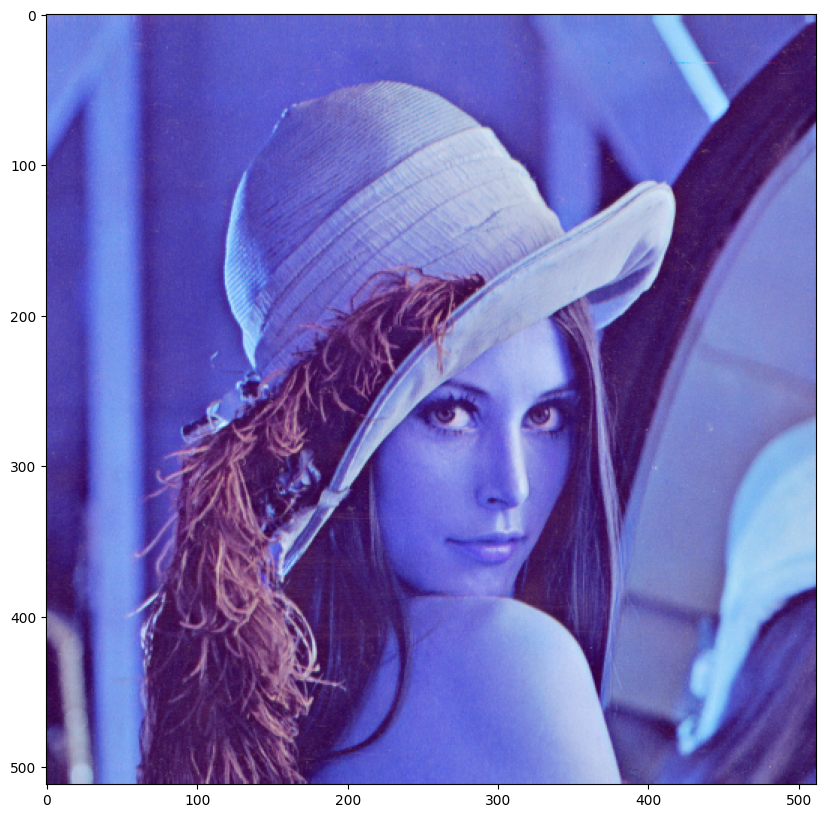

In [ ]:
# Tạo một figure (khung hình) mới để hiển thị ảnh
plt.figure(figsize=(10,10))
# Hiển thị ảnh 'image' sử dụng matplotlib
plt.imshow(image)
plt.show()

The image output doesn't look natural. This is because the order of RGB Channels are different. We can change the color space with conversion code and the function `cvtColor` from the `cv2` library:


In [ ]:
# Chuyển đổi ảnh từ không gian màu BGR (OpenCV) sang RGB
new_image=cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

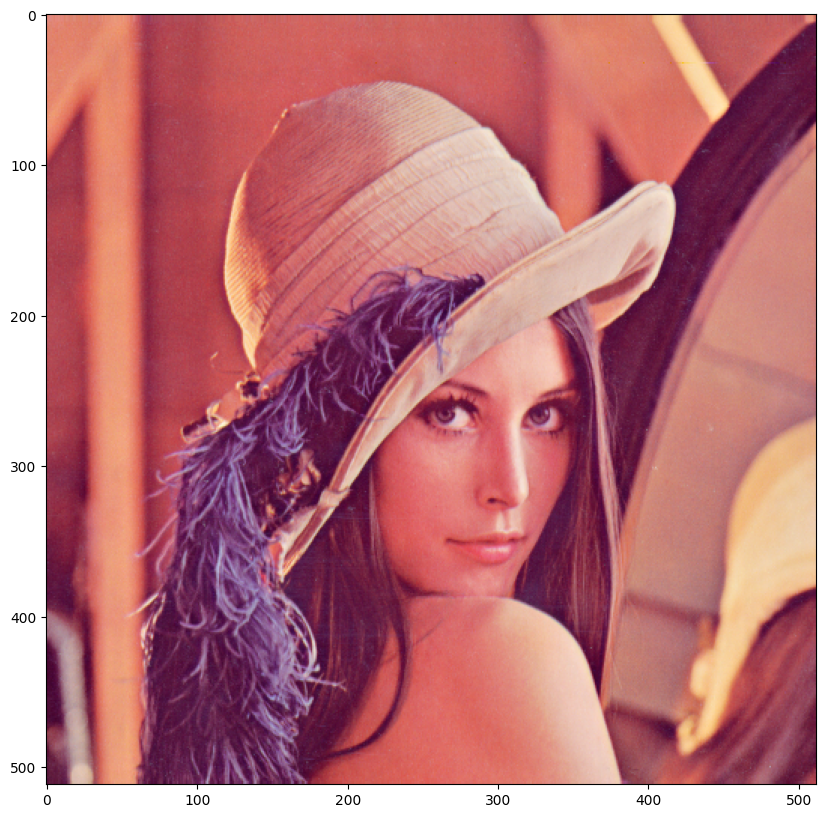

In [ ]:
# Tạo một figure (khung hình) mới để hiển thị ảnh với kích thước 10x10 inch
plt.figure(figsize=(10,10))
plt.imshow(new_image)
plt.show()

You can also load the image using its path, this comes in handy if the image is not in your working directory:


In [ ]:
# Truy cập thuộc tính shape của mảng NumPy để lấy kích thước ảnh
# image.shape trả về một tuple (chiều cao, chiều rộng, số kênh màu)
image = cv2.imread("lenna.png")
image.shape


(512, 512, 3)

You can save the image as in `jpg` format.


In [ ]:
# lưu ảnh
cv2.imwrite("lenna.jpg", image)

True

### Grayscale Images


Grayscale images have pixel values representing the amount of light or intensity. Light shades of gray have a high-intensity darker shades have a lower intensity. White has the highest intensity, and black the lowest. We can convert an image to Gray Scale using a color conversion code and the function <code>cvtColor</code>.


The code for RGB to gray is <code>cv2.COLOR_BGR2GRAY</code>, we apply the function:


In [ ]:
# Chuyển đổi ảnh màu (BGR) sang ảnh xám (grayscale)
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

The image array has only two dimensions, i.e. only one color channel:


In [ ]:
# Kiểm tra kích thước của ảnh xám
image_gray.shape

We can plot the image using `imshow` but we have to specify the color map is gray:


In [ ]:
# Tạo một figure mới với kích thước 10x10 inch để hiển thị ảnh

plt.figure(figsize=(10, 10))
plt.imshow(image_gray, cmap='gray')
plt.show()

We can save the image as a grayscale image, let's save it as a `jpg` as well, in the working directory.


In [ ]:
# Lưu ảnh xám ra file với tên 'lena_gray_cv.jpg'

cv2.imwrite('lena_gray_cv.jpg', image_gray)

You can also load in a grayscale image we have to set <code>flag</code> parameter to gray color conversation code: <code>cv2.COLOR_BGR2GRAY</code>:


In [ ]:
# Đọc ảnh 'barbara.png' trực tiếp dưới dạng ảnh xám
im_gray = cv2.imread('barbara.png', cv2.IMREAD_GRAYSCALE)

We can plot the image:


In [ ]:
# Tạo figure mới với kích thước 10x10 inch
plt.figure(figsize=(10,10))
# Hiển thị ảnh xám đã đọc trực tiếp
plt.imshow(im_gray,cmap='gray')
plt.show()

### Color Channels  


We can also work with the different color channels. Consider the following image:


In [ ]:
# Đọc ảnh 'baboon.png' bằng OpenCV và lưu vào biến 'baboon'
baboon=cv2.imread('baboon.png')
# Tạo figure mới với kích thước 10x10 inch
plt.figure(figsize=(10,10))
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.show()

We can obtain the different RGB colors and assign them to the variables <code>blue</code>, <code>green</code>, and <code>red</code>, in (B, G, R) format.


In [ ]:
# Hiển thị ảnh baboon, chuyển từ BGR sang RGB để hiển thị đúng màu
blue, green, red = baboon[:, :, 0], baboon[:, :, 1], baboon[:, :, 2]

We can concatenate each image channel the images using the function <code>vconcat</code>.


In [ ]:
# Nối dọc (vertical concatenate) 3 kênh màu thành một ảnh dài
im_bgr = cv2.vconcat([blue, green, red])

Plotting the color image next to the red channel in grayscale, we see that regions with red have higher intensity values.


In [ ]:
# Tạo figure mới với kích thước 10x10 inch
plt.figure(figsize=(10,10))

# Tạo subplot 1 (ô bên trái) trong layout 1 hàng, 2 cột
plt.subplot(121)  # 1 hàng, 2 cột, vị trí 1

# Hiển thị ảnh màu gốc (đã chuyển BGR → RGB)
plt.imshow(cv2.cvtColor(baboon, cv2.COLOR_BGR2RGB))
plt.title("RGB image")  

# Tạo subplot 2 (ô bên phải)
plt.subplot(122)  # 1 hàng, 2 cột, vị trí 2

# Hiển thị ảnh nối dọc 3 kênh màu dưới dạng grayscale
# cmap='gray': hiển thị với colormap đen-trắng
plt.imshow(im_bgr, cmap='gray')
plt.title("Different color channels: blue (top), green (middle), red (bottom)")
plt.show()

### Indexing  


We can use numpy slicing. For example, we can return the first 256 rows corresponding to the top half of the image:


In [ ]:
# Khai báo và gán giá trị 256 cho biến 'rows'
rows = 256

In [ ]:
# Tạo một figure mới với kích thước 10x10 inch để hiển thị ảnh
plt.figure(figsize=(10,10))

# Hiển thị một phần của ảnh new_image bằng cách cắt theo chiều dọc (hàng)
plt.imshow(new_image[0:rows,:,:])
plt.show()

We can also return the first 256 columns corresponding to the first half of the image:


In [ ]:
# Khai báo và gán giá trị 256 cho biến 'columns'
columns = 256

In [ ]:
# Tạo một figure mới với kích thước 10x10 inch
plt.figure(figsize=(10,10))
# Hiển thị một phần của ảnh new_image bằng cách cắt theo chiều ngang (cột)

plt.imshow(new_image[:,0:columns,:])
plt.show()

If you want to reassign an array to another variable, you should use the `copy` method (we will cover this in the next section).


In [ ]:
# Tạo một bản sao độc lập (deep copy) của ảnh new_image và gán vào biến A
A = new_image.copy()
plt.imshow(A)
plt.show()

If we do not apply the method `copy()`, the variable will point to the same location in memory. Consider the variable `B` below, if we set all values of array `A` to zero, since `A` and `B` points to the same object in the memory, `B` will also have all-zero elements:


In [ ]:
# Tạo biến B tham chiếu đến cùng một đối tượng với A
B = A

# Gán tất cả các pixel của A về giá trị 0 (màu đen)
A[:,:,:] = 0
plt.imshow(B)
plt.show()

We can also manipulate elements using indexing. In the following piece of code, we create a new array `baboon_red` and set all but the red color channels to zero. Therefore, when we display the image, it appears red:


In [ ]:
# Tạo một bản sao của ảnh baboon gốc 
baboon_red = baboon.copy()

# Xóa kênh màu Blue 
baboon_red[:, :, 0] = 0

# Xóa kênh màu Green 
baboon_red[:, :, 1] = 0

# Tạo một figure mới để hiển thị ảnh
plt.figure(figsize=(10, 10))

# Hiển thị ảnh baboon_red
plt.imshow(cv2.cvtColor(baboon_red, cv2.COLOR_BGR2RGB))


plt.show()

We can do the same for blue:  


In [ ]:
# Tạo một bản sao của ảnh baboon gốc
baboon_green = baboon.copy()

# Xóa kênh màu Blue (Blue channel)

baboon_green[:, :, 0] = 0

# Xóa kênh màu Red (Red channel)
baboon_green[:, :, 2] = 0

# Tạo một figure (khung hình) mới để hiển thị ảnh
# Kích thước figure: 10x10 inch
plt.figure(figsize=(10,10))

# Hiển thị ảnh baboon_green

plt.imshow(cv2.cvtColor(baboon_green, cv2.COLOR_BGR2RGB))
plt.show()

We can do the same for green:


In [ ]:
# Tạo một bản sao của ảnh baboon gốc
baboon_green = baboon.copy()

# Xóa kênh màu Blue (Blue channel)
baboon_green[:, :, 0] = 0

# Xóa kênh màu Red (Red channel)
baboon_green[:, :, 2] = 0

# Tạo một figure (khung hình) mới để hiển thị ảnh
# Kích thước figure: 10x10 inch
plt.figure(figsize=(10,10))

# Hiển thị ảnh baboon_green
# cv2.cvtColor(): Hàm chuyển đổi không gian màu
# cv2.COLOR_BGR2RGB: Tham số chỉ định chuyển từ BGR sang RGB
plt.imshow(cv2.cvtColor(baboon_green, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# cv2.imread(): Hàm đọc ảnh từ đường dẫn file
image=cv2.imread('baboon.png')

In [ ]:
# Tạo figure mới để hiển thị ảnh
# figsize=(10,10): Thiết lập kích thước figure là 10x10 inch
plt.figure(figsize=(10,10))

# Hiển thị ảnh 'image' sử dụng matplotlib
# cv2.cvtColor(image, cv2.COLOR_BGR2RGB): 
#   - Chuyển đổi ảnh từ không gian màu BGR (OpenCV) sang RGB (matplotlib)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.show()

In [ ]:
# Đọc ảnh 'baboon.png'
image = cv2.imread('baboon.png')  

# Tạo một bản sao của ảnh gốc 
baboon_blue = image.copy()

# Xóa kênh màu Green 
# Gán tất cả giá trị pixel của kênh Green bằng 0
baboon_blue[:,:,1] = 0

# Xóa kênh màu Red 
# Gán tất cả giá trị pixel của kênh Red bằng 0
baboon_blue[:,:,2] = 0

# Tạo một figure với kích thước 10x10 inch để hiển thị ảnh
plt.figure(figsize=(10,10))

# Hiển thị ảnh 'baboon_blue'
plt.imshow(cv2.cvtColor(baboon_blue, cv2.COLOR_BGR2RGB))

plt.show() 

### Question 1: 
Use the image `baboon.png` from this lab or take any image you like.

Open the image and create a OpenCV Image object called `baboon_blue`, convert the image from BGR format to RGB format, get the blue channel out of it, and finally plot the image


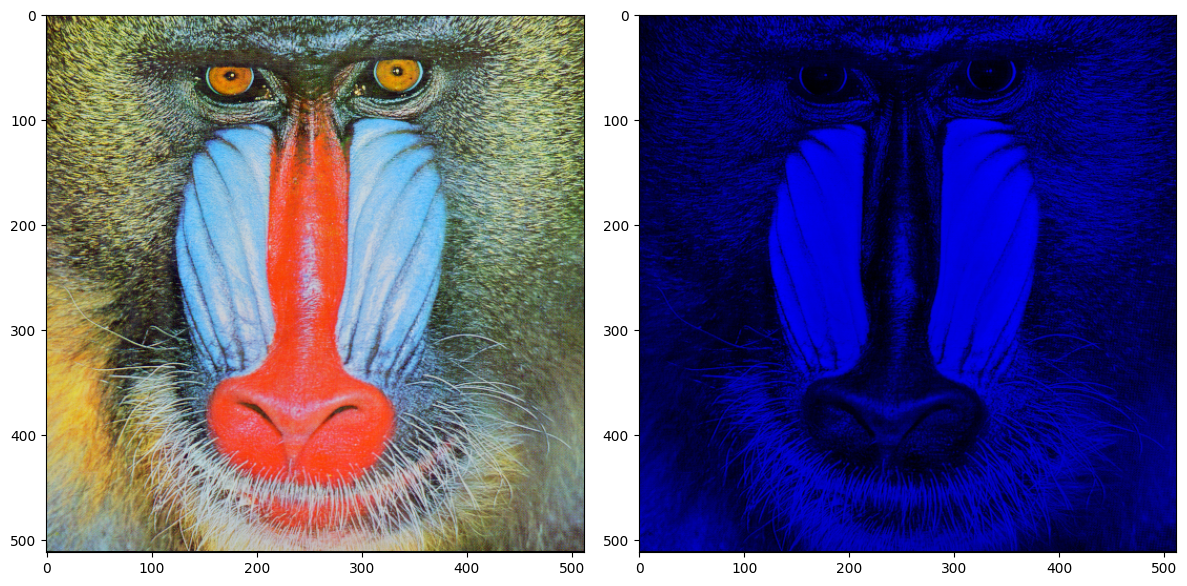

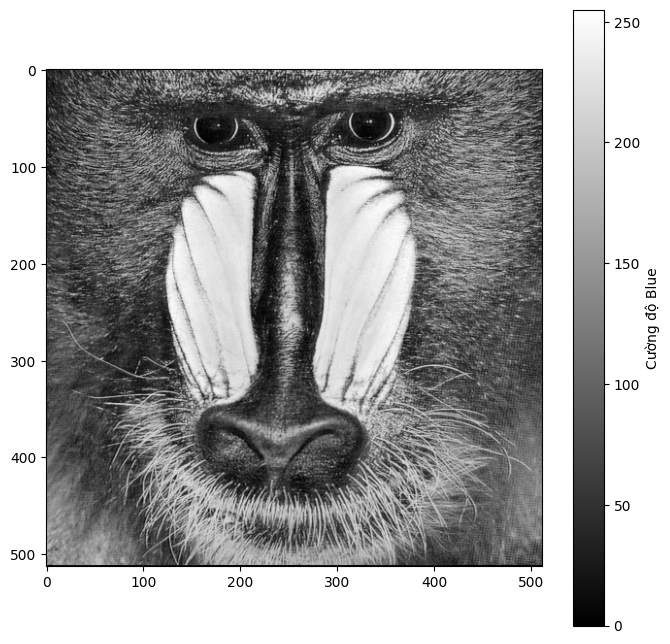

In [2]:
# write your script here
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('baboon.png')

# Kiểm tra ảnh có được đọc thành công 
if image is None:
    print("Không thể đọc ảnh. Kiểm tra đường dẫn file.")
else:
    # Tạo bản sao của ảnh gốc
    baboon_blue = image.copy()
    
    # Chuyển đổi từ BGR sang RGB
    baboon_rgb = cv2.cvtColor(baboon_blue, cv2.COLOR_BGR2RGB)
    
    # Tách kênh màu blue từ ảnh RGB

    blue_channel = baboon_rgb[:, :, 2]  
    
    # Tạo ảnh chỉ có kênh blue (các kênh khác = 0)
    
    blue_image_rgb = np.zeros_like(baboon_rgb)
    blue_image_rgb[:, :, 2] = blue_channel  # Chỉ giữ lại kênh blue

    plt.figure(figsize=(12, 6))
    
    # Subplot 1: Ảnh gốc (RGB)
    plt.subplot(1, 2, 1)
    plt.imshow(baboon_rgb)
    
    # Subplot 2: Ảnh chỉ có kênh blue
    plt.subplot(1, 2, 2)
    plt.imshow(blue_image_rgb)
    
    
    plt.tight_layout()
    plt.show()

    # Hiển thị thêm kênh blue dưới dạng grayscale
    plt.figure(figsize=(8, 8))
    plt.imshow(blue_channel, cmap='gray')
    plt.colorbar(label='Cường độ Blue')
    plt.show()
    

Double-click **here** for a hint.

<!-- The hint is below:

baboon_blue[:,:,2] = 0

-->


Double-click **here** for the solution.

<!-- The answer is below:

baboon_blue=cv2.imread('baboon.png')
baboon_blue=cv2.cvtColor(baboon_blue, cv2.COLOR_BGR2RGB)
baboon_blue[:,:,2] = 0
plt.figure(figsize=(10,10))
plt.imshow(baboon_blue)
plt.show()

-->


Bài tập: So sánh 2 thư viện PIL và CV, liệt kê so sánh trong 1 cell markdown ở file 2.1.2 


```

Tổng quan

- PIL / Pillow
  Thư viện Python thuần, tập trung vào xử lý ảnh cơ bản.

- OpenCV
  Thư viện viết bằng C++, có Python binding, chuyên cho Computer Vision và xử lý ảnh/video hiệu suất cao.

---


Ứng dụng

Dùng PIL / Pillow khi:
- Xử lý ảnh đơn giản cho web
- Cần thư viện nhẹ, dễ học
- Làm watermark, chuyển đổi định dạng ảnh
- Làm việc với ảnh tĩnh
- Tiền xử lý ảnh cho ML (kết hợp NumPy)


Dùng OpenCV khi:
- Làm Computer Vision projects
- Xử lý video, webcam, real-time
- Bài toán detection, recognition, tracking
- Yêu cầu hiệu suất cao
- Pipeline CV kết hợp ML hoặc DL

Vậy nên

- PIL phù hợp cho xử lý ảnh nhẹ và cơ bản
- OpenCV phù hợp cho Computer Vision chuyên sâu
- Trong dự án ML/DL thực tế, thường kết hợp cả hai thư viện
```




# References 


[1]  Images were taken from: https://homepages.cae.wisc.edu/~ece533/images/
    
[2]  <a href='https://pillow.readthedocs.io/en/stable/index.html'>Pillow Docs</a>

[3]  <a href='https://opencv.org/'>Open CV</a>

[4] Gonzalez, Rafael C., and Richard E. Woods. "Digital image processing." (2017).


<!--<h2>Change Log</h2>-->


<!--
<table>
    <tr>
        <th>Date (YYYY-MM-DD)</th>
        <th>Version</th>
        <th>Changed By</th>
        <th>Change Description</th>
    </tr>
    <tr>
        <td>2020-07-20</td>
        <td>0.2</td>
        <td>Azim</td>
        <td>Modified Multiple Areas</td>
    </tr>
    <tr>
        <td>2020-07-17</td>
        <td>0.1</td>
        <td>Azim</td>
        <td>Created Lab Template</td>
    </tr>
    <tr>
        <td>2021-03-06</td>
        <td>0.3</td>
        <td>Nayef</td>
        <td>Modified some codes</td>
    </tr>
</table>
-->
